# Imports & Config

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Style plot
plt.style.use('default')
font = {'size' : 32}
plt.rc('font', **font)
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

# Define functions

In [16]:
def get_percentage_df(df):
    df_perc = df[df['verified'] == True].groupby('millis').mean()
    df_perc['percentage_solved'] = 0.0
    size = df.shape[0]
    print("Dataframe contains " + str(size) + " elements")

    for index, row in df_perc.iterrows():
        df_solved = df[df['verified'] == True]
        num_solved = df_solved[df_solved['millis'] <= index].shape[0]
        percentage_solved = num_solved / df.shape[0]
        df_perc.at[index, 'percentage_solved'] = percentage_solved
    df_perc.at[180000, 'percentage_solved'] = df[df['verified'] == True].shape[0] / df.shape[0]

    return df_perc

def get_heuristic_percentage_df(df):
    df_perc = df.groupby('difference').mean()
    df_perc['percentage_solved'] = 0.0
    size = df.shape[0]
    print("Dataframe contains " + str(size) + " elements")

    for index, row in df_perc.iterrows():
        num_solved = df[df['difference'] <= index].shape[0]
        percentage_solved = num_solved / df.shape[0]
        df_perc.at[index, 'percentage_solved'] = percentage_solved
    #df_perc.at[180000, 'percentage_solved'] = df[df['verified'] == True].shape[0] / df.shape[0]

    return df_perc

def add_percentage_df(df_perc, df_add):
    df_perc['percentage_solved_y'] = 0.0
    for index, row in df_perc.iterrows():
        df_solved = df_add[df_add['verified'] == True]
        num_solved = df_solved[df_solved['millis'] <= index].shape[0]
        percentage_solved = num_solved / df_add.shape[0]
        df_perc.at[index, 'percentage_solved_y'] = percentage_solved
    df_perc.at[180000, 'percentage_solved_y'] = df_add[df_add['verified'] == True].shape[0] / df_add.shape[0]
    return df_perc

def split_synthetic_complex(df):
    df_synthetic = df[df['name'].str.match('synth')]
    df_complex = df[~df['name'].str.match('synth')]
    return df_synthetic, df_complex

def print_results(name, df):
    print("Results for '" + name + "':")
    df_synthetic, df_complex = split_synthetic_complex(df)
    num_synthetic = df_synthetic.shape[0]
    df_synthetic_solved = df_synthetic[df_synthetic['verified'] == True]
    num_synthetic_solved = df_synthetic_solved.shape[0]
    percentage_solved = num_synthetic_solved * 100 / num_synthetic if num_synthetic else 100
    print("Synthetic: " + str(num_synthetic_solved) + "/" + str(num_synthetic) + " (" + str(round(percentage_solved, 2)) + "%)")

    num_complex = df_complex.shape[0]
    df_complex_solved = df_complex[df_complex['verified'] == True]
    num_complex_solved = df_complex_solved.shape[0]
    percentage_solved = num_complex_solved * 100 / num_complex if num_complex else 100
    print("Complex: " + str(num_complex_solved) + "/" + str(num_complex) + " (" + str(round(percentage_solved, 2)) + "%)")

    num_overall = df.shape[0]
    df_solved = df[df['verified'] == True]
    num_solved = df_solved.shape[0]
    percentage_solved = num_solved * 100 / num_overall if num_overall else 100
    print("Overall: " + str(num_solved) + "/" + str(num_overall) + " (" + str(round(percentage_solved, 2)) + "%)")
    print()

# Load Data

In [33]:
# Create pandas dataframes from csv
df_0 = pd.read_csv("../logs/v5/HeuristicLog-5.1_MinMax.csv", sep=",", header=0)
df_0['difference'] = df_0['k_approx'] / df_0['k_optimal']
df_1 = pd.read_csv("../logs/v5/HeuristicLog-5.2_Cycles.csv", sep=",", header=0)
df_1['difference'] = df_1['k_approx'] / df_1['k_optimal']


# Heuristic Line Plot

Dataframe contains 643 elements
Dataframe contains 643 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_16224/2610425726.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


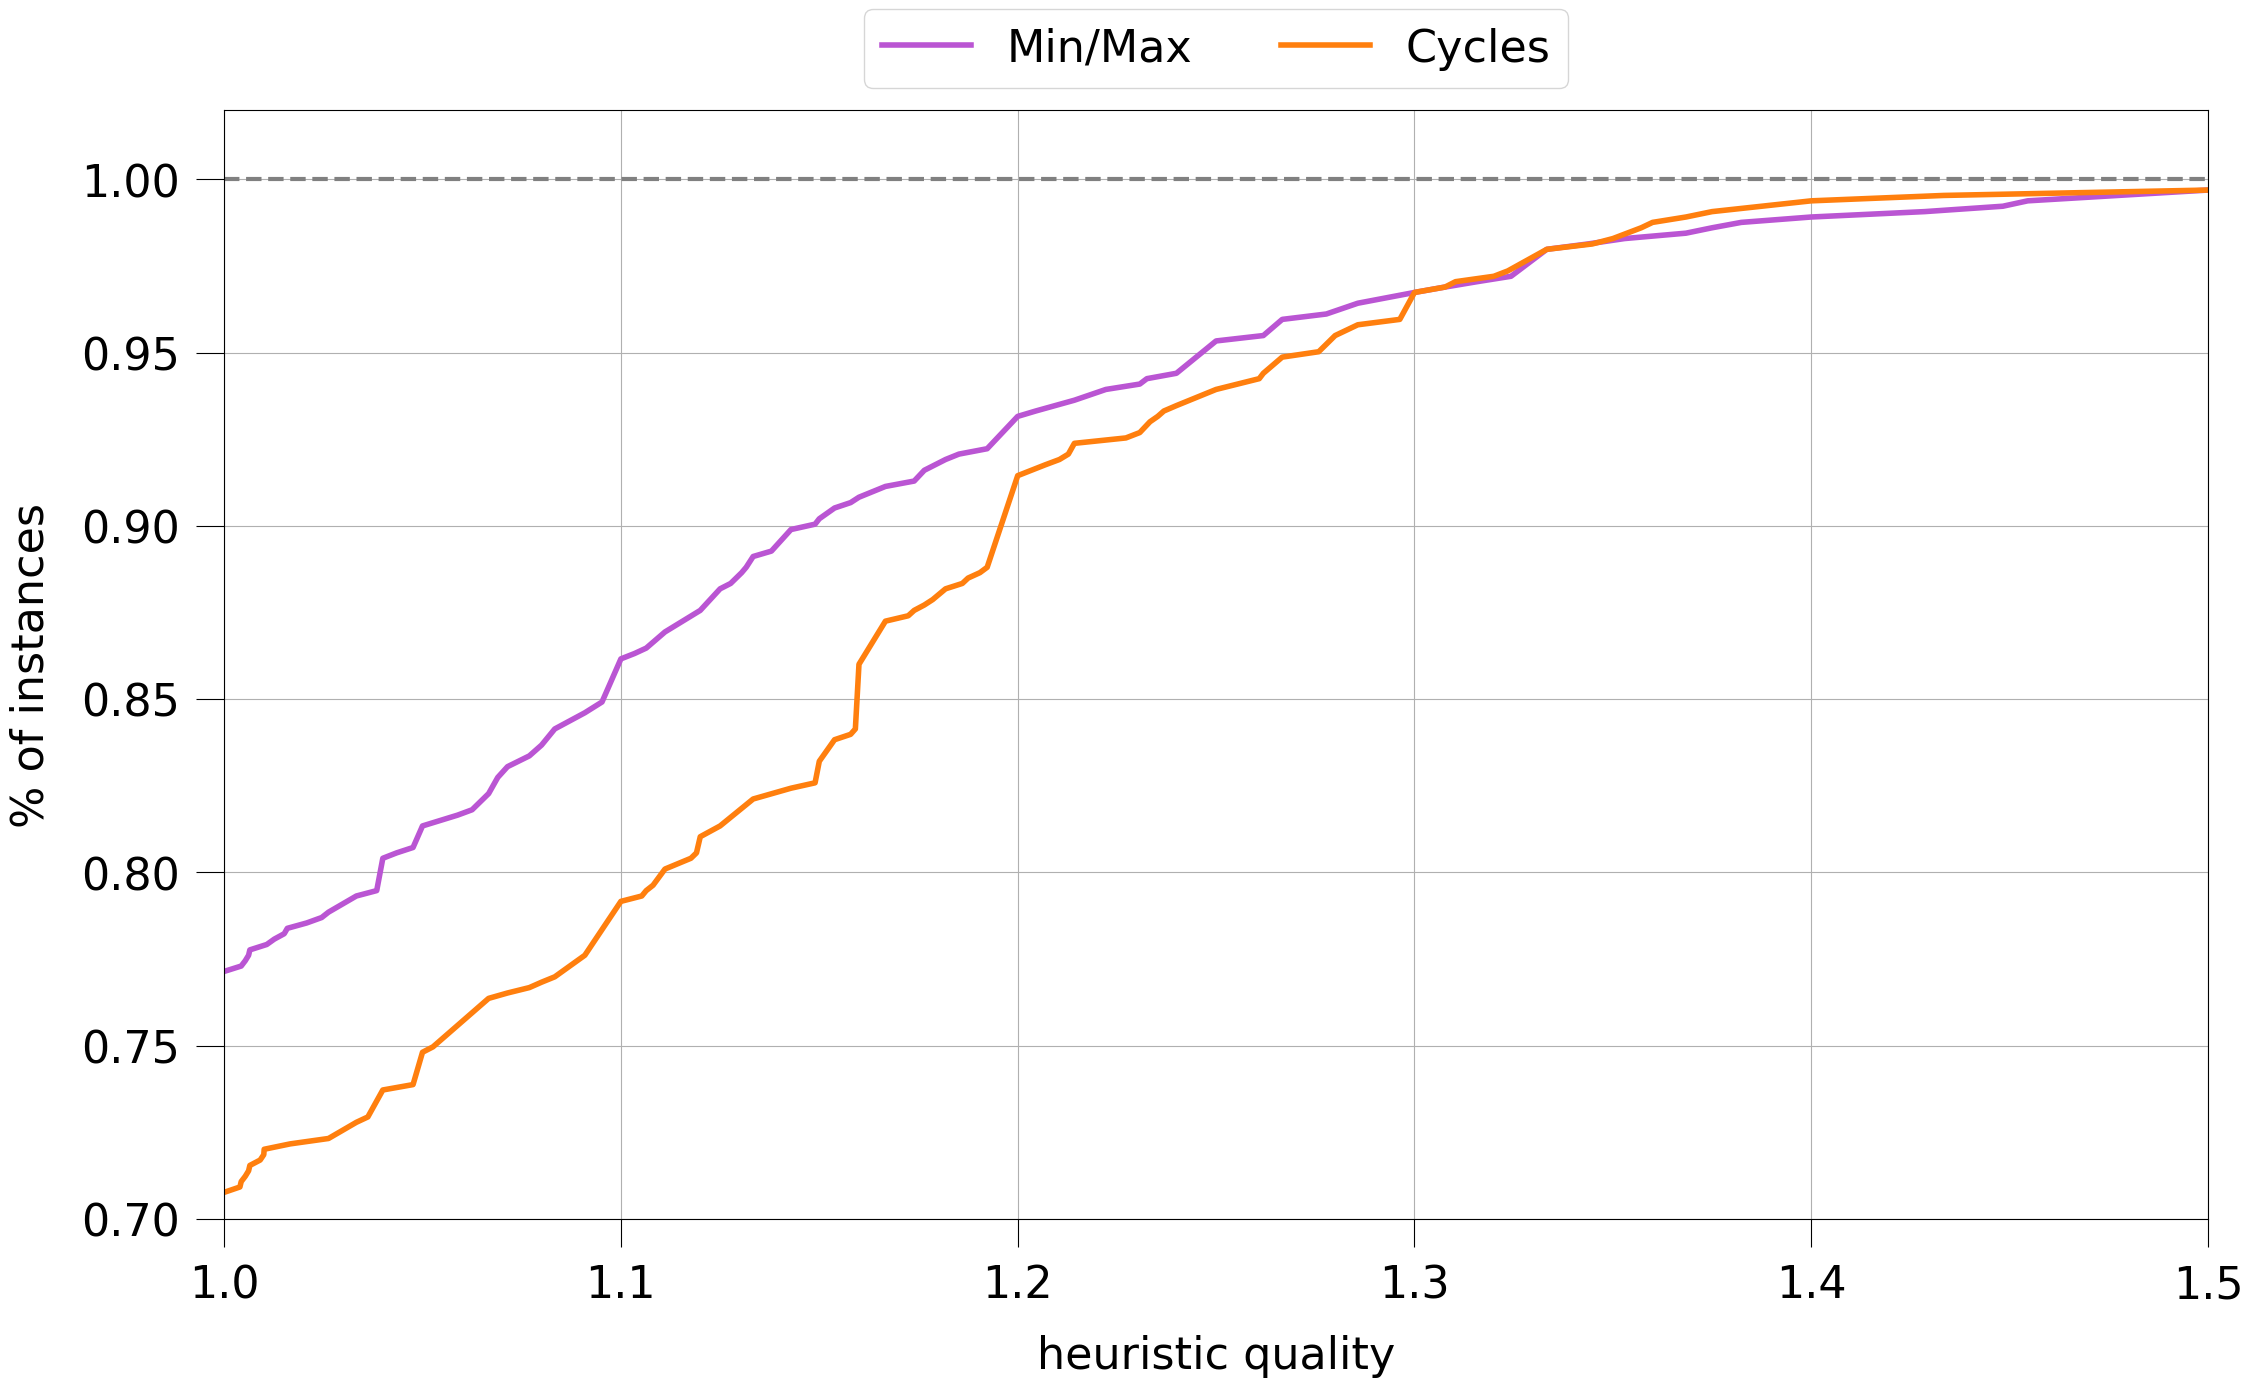

In [40]:
# Calculate percentage dataframes
df_0_perc = get_heuristic_percentage_df(df_0)
df_1_perc = get_heuristic_percentage_df(df_1)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_0_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='Min/Max')
ax.plot(df_1_perc['percentage_solved'], c='tab:orange', linewidth='4', label='Cycles')

ax.set_xlabel('heuristic quality', labelpad=20)
ax.set_ylabel('% of instances', labelpad=20)
ax.set_xlim([1.0, 1.5])
ax.set_ylim([0.7, 1.02])
#ax.set_xscale('log')
#ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
#ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
#ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
#ax.text(185000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v5/HeuristicLinePlot.png',  bbox_inches='tight')
fig.show()